In [172]:
## Import libraries

import numpy as np
import pandas as pd
import json
import unittest
from pandas.testing import assert_frame_equal

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

# Utility Functions

In [173]:
## read json as a dataframe
def read_data(filename):
    with open(f"./bloommoney_ravi/data/{filename}",'r') as f:
        data = json.loads(f.read())

    df = pd.json_normalize(data, record_path =['results'])
    return df


############################################################################################################################################################################

## display datasets
def show_tables(table_list):   
    for i in table_list:
        print('\033[1m' + i.split("_")[1])
        display(read_data(i))
        print("-------------------------------------------------------**********************************************************------------------------------------------------------------\n\n\n")
        
        
############################################################################################################################################################################

## plot function
def display_plot(x_value, y_value ,plot_title,plot_type): 
    plt.figure(figsize=(16,6))
    plt.title(plot_title)
    plt.xticks(rotation=90)
    
    if (plot_type =="line"):
        sns.lineplot(x = x_value,y= y_value, ci=None)
    else:
        sns.barplot(x = x_value,y= y_value, ci=None)

# Datasets

In [174]:
## datsets
cards = "2023-02-28_cards.json"
cards_balance = "2023-02-28_card-balance_2cbf9b6063102763ccbe3ea62f1b3e72.json"
accounts = "2023-02-28_accounts.json"
accounts_transactions = "2023-02-28_account-transactions-pending_3c6edb9484ecd581dc1cedde8bedb1f1.json"
accounts_transactions_finalised = "2023-02-28_account-transactions-finalised_3c6edb9484ecd581dc1cedde8bedb1f1.json"
account_standing_order = "2023-02-28_account-standing-orders_3c6edb9484ecd581dc1cedde8bedb1f1.json"
account_direct_debits = "2023-02-28_account-direct-debits_3c6edb9484ecd581dc1cedde8bedb1f1.json"
account = "2023-02-28_account_3c6edb9484ecd581dc1cedde8bedb1f1.json"

## list of user datasets
table_list = [cards,cards_balance,accounts, accounts_transactions,accounts_transactions_finalised, account_standing_order,account_direct_debits,account]

## show tables
show_tables(table_list)

cards.json


,account_id,card_network,card_type,currency,display_name,partial_card_number,name_on_card,update_timestamp,provider.display_name,provider.provider_id,provider.logo_uri
0,2cbf9b6063102763ccbe3ea62f1b3e72,MASTERCARD,CREDIT,GBP,CREDIT CARD 1,1000,John Doe,2023-02-28T13:40:33.4794294Z,MOCK,mock,mock-bank.png
1,328f557c68aebd532cbbd05ce5bcb6c8,VISA,CREDIT,GBP,CREDIT CARD 2,2000,John Doe,2023-02-28T13:40:33.4794395Z,MOCK,mock,mock-bank.png


-------------------------------------------------------**********************************************************------------------------------------------------------------



card-balance


,currency,available,current,credit_limit,last_statement_date,last_statement_balance,payment_due,payment_due_date,update_timestamp
0,GBP,8100.0,3900.0,12000.0,2023-02-06T00:00:00Z,1.0,2.0,2023-03-01T00:00:00Z,2023-02-28T13:41:25.1210692Z


-------------------------------------------------------**********************************************************------------------------------------------------------------



accounts.json


,update_timestamp,account_id,account_type,display_name,currency,account_number.iban,account_number.swift_bic,account_number.number,account_number.sort_code,provider.display_name,provider.provider_id,provider.logo_uri
0,2023-02-28T13:23:38.9438086Z,56c7b029e0f8ec5a2334fb0ffc2fface,TRANSACTION,TRANSACTION ACCOUNT 1,GBP,GB08CLRB04066800003435,CPBKGB00,10000000,01-21-31,MOCK,mock,mock-bank.png
1,2023-02-28T13:23:38.9438198Z,3c6edb9484ecd581dc1cedde8bedb1f1,SAVINGS,SAVINGS ACCOUNT 1,GBP,GB08CLRB04066800003435,CPBKGB00,20000000,01-21-31,MOCK,mock,mock-bank.png
2,2023-02-28T13:23:38.9438269Z,89c3139784a055b9b47998f9dce9122e,TRANSACTION,TRANSACTION ACCOUNT 2,GBP,GB08CLRB04066800003435,CPBKGB00,30000000,01-21-31,MOCK,mock,mock-bank.png
3,2023-02-28T13:23:38.9438358Z,328df3a40b828340fa4c3100e17de121,SAVINGS,SAVINGS ACCOUNT 2,GBP,GB08CLRB04066800003435,CPBKGB00,40000000,01-21-31,MOCK,mock,mock-bank.png
4,2023-02-28T13:23:38.9438425Z,8de2de9eab01b935b21abcbed11adf26,TRANSACTION,TRANSACTION ACCOUNT 3,GBP,GB08CLRB04066800003435,CPBKGB00,50000000,01-21-31,MOCK,mock,mock-bank.png


-------------------------------------------------------**********************************************************------------------------------------------------------------



account-transactions-pending


,timestamp,description,transaction_type,transaction_category,transaction_classification,merchant_name,amount,currency,transaction_id,provider_transaction_id,normalised_provider_transaction_id,meta.provider_transaction_category
0,2023-02-28T00:00:00Z,Tesco,DEBIT,PURCHASE,"[Shopping, Groceries]",Tesco,-12.59,GBP,322d9b14c51889c8dd56dee62d2968ac,397743ba9326243fc6,txn-0a179c3ea437082c4,DEB
1,2023-02-28T00:00:00Z,PAYPAL GUMTREE,DEBIT,PURCHASE,"[Shopping, General]",Paypal,-75.56,GBP,05e24479e620b6ed599fcbbaaccd1fa1,d65d72626c52f9de65,txn-e133a33d62f59b49a,DEB
2,2023-02-28T00:00:00Z,Tesco Online Shopping,DEBIT,PURCHASE,[],NaN,-3.59,GBP,daa422a5865fc5269cf2b57ca81fc8c5,9e549549b536d5b365,txn-576fffd3370ca7744,DEB
3,2023-02-27T00:00:00Z,WWW.ANNSUMMERS.COM,DEBIT,PURCHASE,[],NaN,-12.50,GBP,15d8ea91c22c4d09e982c90b8948852e,d5a1b6afa62b3e0388,txn-458d509d9232ffefe,DEB


-------------------------------------------------------**********************************************************------------------------------------------------------------



account-transactions-finalised


,timestamp,description,transaction_type,transaction_category,transaction_classification,amount,currency,transaction_id,provider_transaction_id,normalised_provider_transaction_id,running_balance.currency,running_balance.amount,meta.provider_transaction_category,merchant_name
0,2023-02-28T00:00:00Z,TSB CLEVELEYS,CREDIT,CASH,[],420.00,GBP,035d1a5544f7140e8078b22870f4564c,b86f5baaedaf07215e,txn-27bfe30f0fbf68a8b,GBP,-640.42,CSH,NaN
1,2023-02-28T00:00:00Z,AMAZON INT'L,DEBIT,PURCHASE,"[Shopping, General]",-36.59,GBP,717fedb314f9db6ca44f453d163f17d1,f3bcc58aa0e6122fca,txn-8ce695e008318e59e,GBP,-677.01,DEB,Amazon
2,2023-02-28T00:00:00Z,RETURNED DD,CREDIT,CREDIT,[],40.00,GBP,39ec9d8e70f02acd6219f60b95cb5b0f,9b139fe4252f448434,txn-dc5ed967bf3108f80,GBP,-637.01,DEP,NaN
3,2023-02-28T00:00:00Z,MR JOHN SMITH,DEBIT,TRANSFER,[],-32.72,GBP,d23f46411af1acdc8ac38f1ad66dcc98,e1737ce56be2b49ed8,txn-86060ae423cabe98e,GBP,-669.73,TFR,NaN
4,2023-02-28T00:00:00Z,WORKING TAX CREDIT,CREDIT,CREDIT,[],22.42,GBP,6533d91e103cbbc308772c75abf4e650,1c5edd3c26f67166c2,txn-fa7974cfd2337653d,GBP,-647.31,BGC,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,2022-12-03T00:00:00Z,WWW.ASDA.COM,DEBIT,PURCHASE,"[Shopping, Groceries]",-5.00,GBP,6280155bf3c5b9e9b3e576c479ca1b81,a4b2c6dbbef65e7077,txn-9ff65b2871110a5fe,GBP,631.32,DEB,Asda
415,2022-12-02T00:00:00Z,MR JOHN SMITH,CREDIT,TRANSFER,[],30.00,GBP,55f98b8bf7c7d1da10a584c0f80acb0a,a5234ac50e4df66741,txn-edc6a8643c2e3995a,GBP,661.32,TFR,NaN
416,2022-12-02T00:00:00Z,LNK ATM LONDON,DEBIT,ATM,[],-30.00,GBP,6a0b0e4d3a1135308a4de213a0f4b4a2,965941baba84507095,txn-308011f2bae16592f,GBP,631.32,CPT,NaN
417,2022-12-02T00:00:00Z,MR JOHN SMITH,CREDIT,TRANSFER,[],10.00,GBP,04c2475f02b434fe34ba5da5ffcc759d,2f632b2405b574dd35,txn-fe779178c31a3a58e,GBP,641.32,TFR,NaN


-------------------------------------------------------**********************************************************------------------------------------------------------------



account-standing-orders


,frequency,status,timestamp,currency,next_payment_date,next_payment_amount,first_payment_date,first_payment_amount,final_payment_date,final_payment_amount,reference,meta.provider_account_id,meta.provider_standing_order_id,payee
0,IntrvlMnthDay:01:26,Active,2019-07-24T11:29:47Z,GBP,2023-03-28T13:39:46.016Z,500.0,2023-02-18T13:39:46.016Z,535.0,2024-02-28T13:39:46.016Z,500.0,Savings,12345ca1-18fd-4e6b-891e-0597cac6bb8c,67020711,NaN
1,IntrvlMnthDay:01:30,Active,2019-07-24T11:29:47Z,GBP,2023-03-20T13:39:46.016Z,1500.0,2022-07-28T13:39:46.016Z,1500.0,2023-09-28T13:39:46.017Z,1500.0,MONZO,12345ca1-18fd-4e6b-891e-0597cac6bb8c,NaN,JOHN DOE


-------------------------------------------------------**********************************************************------------------------------------------------------------



account-direct-debits


,direct_debit_id,timestamp,name,status,previous_payment_amount,currency,meta.provider_account_id,meta.provider_mandate_identification,previous_payment_timestamp
0,11fc25c96467f4221daf499983c0b8ee,2023-02-28T12:39:08.948Z,EE,Active,25.50,GBP,1000000000000000002,6,NaN
1,684a18d78e098714202e159ebf418e48,2023-02-28T12:39:08.948Z,PAYPAL,Active,NaN,NaN,2000000000000000002,9,2023-02-03T13:39:08.948Z
2,089c01e847ba8082d97dcb19ab3cef26,2023-02-28T12:39:08.948Z,BT INTERNET,NaN,16.99,GBP,3000000000000000002,7,2023-02-08T13:39:08.948Z


-------------------------------------------------------**********************************************************------------------------------------------------------------



account


,update_timestamp,account_id,account_type,display_name,currency,account_number.iban,account_number.swift_bic,account_number.number,account_number.sort_code,provider.display_name,provider.provider_id,provider.logo_uri
0,2023-02-28T13:33:42.6198907Z,3c6edb9484ecd581dc1cedde8bedb1f1,SAVINGS,SAVINGS ACCOUNT 1,GBP,GB08CLRB04066800003435,CPBKGB00,20000000,01-21-31,MOCK,mock,mock-bank.png


-------------------------------------------------------**********************************************************------------------------------------------------------------





# Analysis functions

In [180]:
def incoming_outgoing_payments(accounts_transactions_finalised_table):
    
    # read accounts_transactions_finalised table
    df = read_data(accounts_transactions_finalised_table)
    
    # group by description which shows the source of trasactions
    df_incoming_outgoing_payments = df.groupby(['description','transaction_type'])["transaction_id"].count().reset_index()
    df_incoming_outgoing_payments = df_incoming_outgoing_payments.rename(columns={'transaction_id': 'frequency'})
    
    #incoming payments are the credited payments
    df_incoming_payments = df_incoming_outgoing_payments.loc[df_incoming_outgoing_payments["transaction_type"]=="CREDIT"].sort_values(by=['frequency'], ascending=False)
    
    #outgoing payments are the debited payments
    df_outgoing_payments = df_incoming_outgoing_payments.loc[df_incoming_outgoing_payments["transaction_type"]=="DEBIT"].sort_values(by=['frequency'], ascending=False)
    
    # plot the frequency plot if incoming and outgoing payments
    #display_plot(df_incoming_payments["description"], df_incoming_payments["frequency"] ,"Incoming Payments and their frequency","")
    #display_plot(df_outgoing_payments["description"], df_outgoing_payments["frequency"] ,"Outgoing payments and their frequency","")
    
    #save the output in json format
    df_incoming_payments.reset_index(drop=True).to_json('./bloommoney_ravi/output/incoming_payments.json')
    df_outgoing_payments.reset_index(drop=True).to_json('./bloommoney_ravi/output/outgoing_payments.json')
    
    return df_incoming_payments[["description","transaction_type","frequency"]].reset_index(drop=True)

############################################################################################################################################################################

def income_sources(accounts_transactions_finalised_table):
    
    # read accounts_transactions_finalised table
    df  = read_data(accounts_transactions_finalised_table)
    
    # group by description which shows the source of trasactions
    df_income_sources = df.groupby(['description','transaction_type']).sum().reset_index()
    
    # In order to find the income source we need to find the souces for which transaction type is CREDIT
    df_income_sources = df_income_sources.loc[df_income_sources["transaction_type"]=="CREDIT"].sort_values(by=['amount'], ascending=False)
    
    # calculate and add the precentage column
    df_income_sources["percentage_contribution"] = df_income_sources["amount"]/(df_income_sources["amount"].sum())*100
    
    # plot the barplot with percentage
    #display_plot(df_income_sources["description"], df_income_sources["percentage_contribution"] ,"Source of income and their percentage contribution","")
    
    # save the output in json format
    df_income_sources[["description","transaction_type", "percentage_contribution"]].reset_index(drop=True).to_json('./bloommoney_ravi/output/income_sources_percentage_contribution.json')
    
    return df_income_sources[["description","amount","percentage_contribution"]].reset_index(drop=True)

,description,amount,percentage_contribution
0,CLEVELEYS.COM,4351.26,35.173123
1,CHILD TAX CREDIT,2074.44,16.768599
2,MR JOHN SMITH,1266.60,10.238477
3,TSB CLEVELEYS,1260.00,10.185127
4,MS JANE DOE,985.92,7.969619
5,CIRCLE UK TRADING,547.71,4.427378
6,ANYVAN LTD,485.01,3.920546
7,WORKING TAX CREDIT,336.30,2.718459
8,RETURNED DD,240.00,1.940024
9,CASHBACK,210.00,1.697521


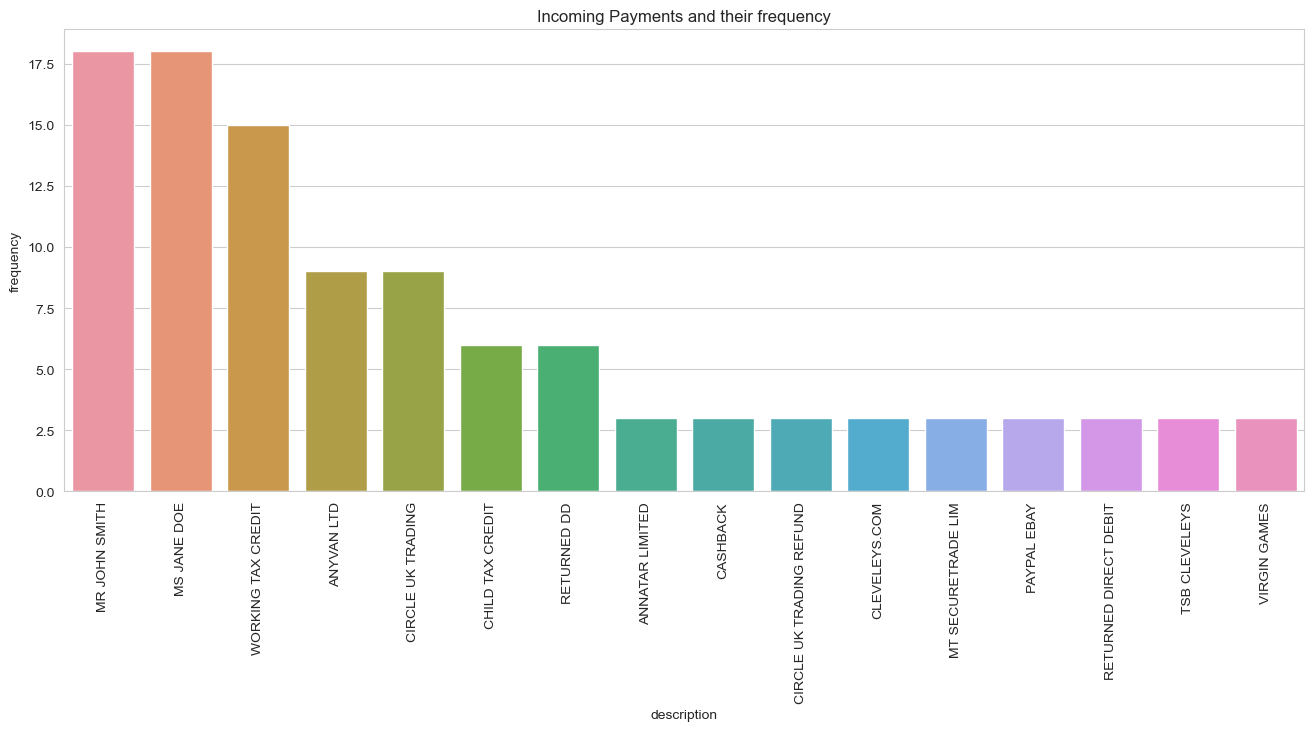

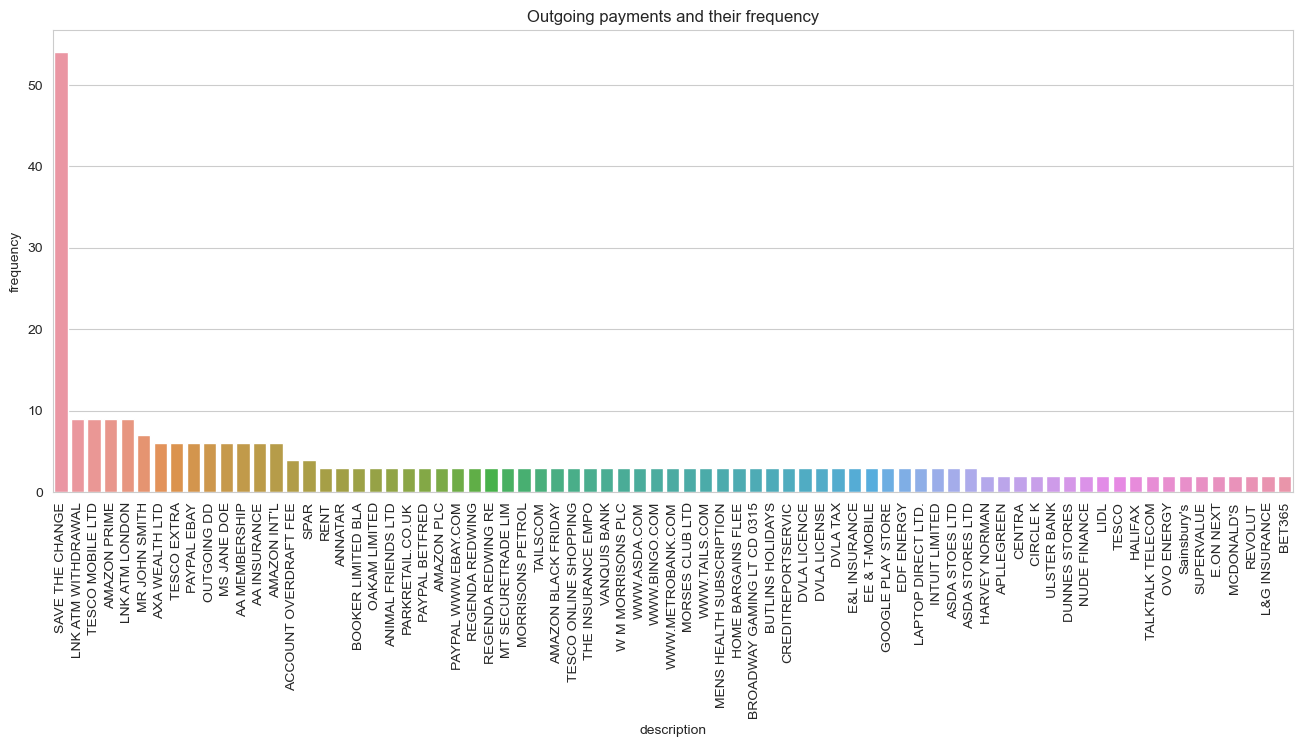

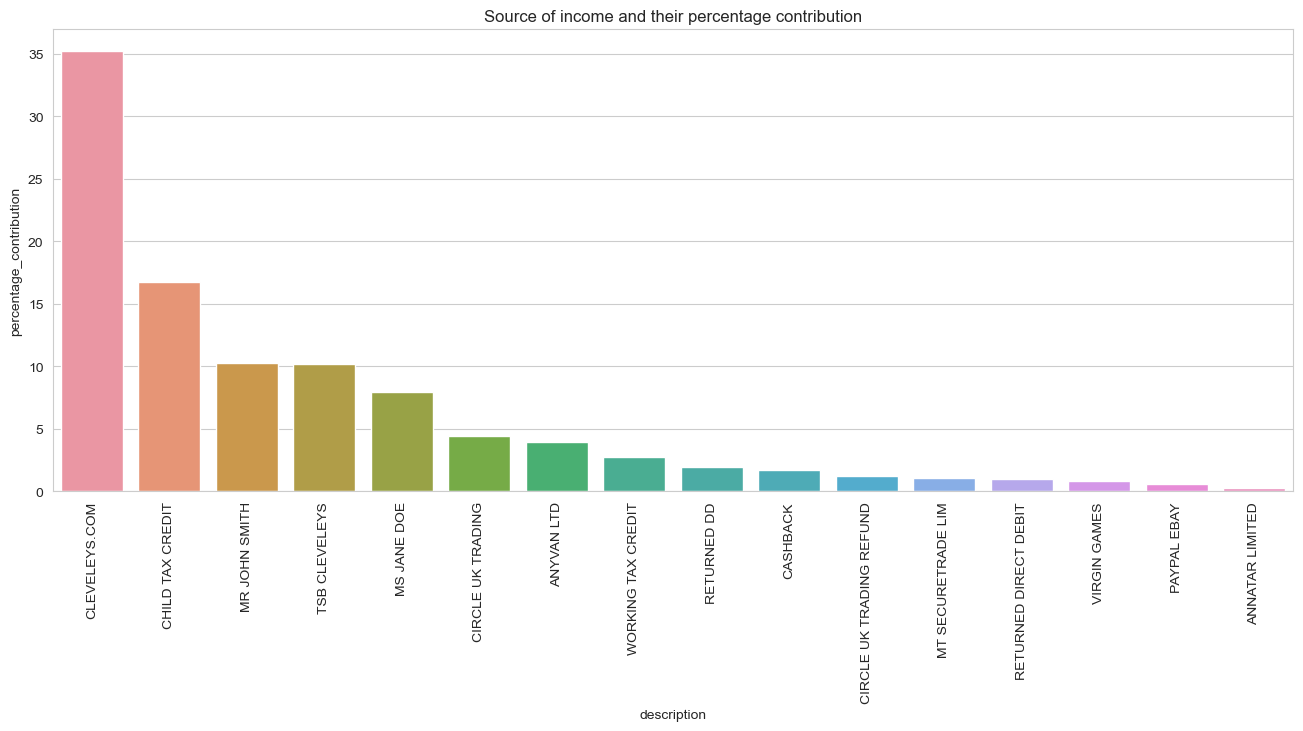

In [178]:
incoming_outgoing_payments(accounts_transactions_finalised)
income_sources(accounts_transactions_finalised)

# Tests

In [181]:
class TestDataFrame(unittest.TestCase):
    
    def test_if_reading_the_correct_dataframe(self, df): 
        expected  = incoming_outgoing_payments(accounts_transactions_finalised)
        assert_frame_equal(expected, incoming_outgoing_payments(df))
        
        
t = TestDataFrame()
t.test_if_reading_the_correct_dataframe(accounts_transactions_finalised)

# Suggestions for any next steps and other factors that could potentially affect customer affordability included in the data set



1. Direct debits: People often forget about the subscriptions they have activated, and sometimes money is deducted from their account without them noticing. Therefore, 
a dashboard or a list of current direct debits would be useful for the user to keep track of their current subscriptions and make cancellations or changes as needed.


Next steps:

1. Send a warning if the current credit is low, based on the amount column in the account-transactions-finalised dataset. 
Additionally, suggest avoiding or cutting back on items (say top 5 categories) such as Amazon Prime, Amazon shopping, and eBay, which significantly contribute to outgoing payments for the current user.

2. Show a visual representation of the available balance in the account, pending payements along with a visual representation of the categories contributing to the most outgoing payments. For example, if the user sees that they had spent a significant amount on Amazon last month, and in the middle orlast week of the month they had no or negative account balance left in the account, they may be motivated and convinced not to spend money in that area.

3. Show trends for the last 2-3 months on the incoming and outgoing payments

